**HOTEL BOOKING DEMAND**

*Life cycle of Data Analysis project*

*1. Problem Statement*

The objective of this project is to analyze hotel booking data to understand customer booking behavior and identify factors that influence booking cancellations, stay duration, pricing, and demand patterns.
The insights from this analysis can help hotels improve revenue management, customer retention, and operational planning.

*2) Data Collection*   
Dataset Source - https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand

The dataset contains booking information for a city hotel and a resort hotel, including customer demographics, booking details, pricing, and cancellation status.  
Rows: 119,390 :
Columns: 32

  2.1 Import Data and Required Packages

In [1]:
!pip install numpy

In [2]:
!pip install pandas


In [3]:
!pip install matplotlib

In [4]:
!pip install seaborn

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
#Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

2.2 Load Dataset

In [7]:
df = pd.read_csv('hotel_bookings.csv')
#show top 5 records
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [8]:
#Shape of the dataset
df.shape

(119390, 32)

2.3 Dataset information

• hotel : type of hotel → (City Hotel / Resort Hotel)  
• is_canceled : indicates whether the booking was canceled → (0 = Not Canceled, 1 = Canceled)  
• lead_time : number of days between booking date and arrival date  
• arrival_date_year : year of arrival date  
• arrival_date_month : month of arrival date  
• arrival_date_week_number : week number of the year for arrival date  
• arrival_date_day_of_month : day of the month of arrival  
• stays_in_weekend_nights : number of weekend nights (Saturday or Sunday) the guest stayed  
• stays_in_week_nights : number of week nights (Monday to Friday) the guest stayed  
• adults : number of adults in the booking  
• children : number of children in the booking  
• babies : number of babies in the booking  
• meal : type of meal booked → (BB, HB, FB, SC, Undefined)  
• country : country of origin of the guest  
• market_segment : market segment designation → (Online TA, Offline TA/TO, Direct, Corporate, etc.)  
• distribution_channel : booking distribution channel → (TA/TO, Direct, Corporate, GDS)  
• is_repeated_guest : indicates if the guest is a repeated guest → (0 = No, 1 = Yes)  
• previous_cancellations : number of previous canceled bookings by the customer  
• previous_bookings_not_canceled : number of previous bookings not canceled by the customer  
• reserved_room_type : code of room type reserved  
• assigned_room_type : code of room type assigned to the booking  
• booking_changes : number of changes made to the booking  
• deposit_type : type of deposit made → (No Deposit, Non Refund, Refundable)  
• agent : ID of the travel agent who made the booking  
• company : ID of the company that made the booking  
• days_in_waiting_list : number of days the booking was on the waiting list  
• customer_type : type of customer → (Transient, Contract, Transient-Party, Group)  
• adr : Average Daily Rate (price per night)  
• required_car_parking_spaces : number of car parking spaces required  
• total_of_special_requests : number of special requests made by the guest  
• reservation_status : final status of the reservation → (Canceled, Check-Out, No-Show)  
• reservation_status_date : date when the reservation status was last updated  

*3) Data checks to perform*  

3.1 Check missing values

In [9]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

3.2 Check duplicates

In [10]:
df.duplicated().sum()

np.int64(31994)

3.3 Check data types

In [11]:
#Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

3.4 Checking the number of unique values of each column

In [12]:
df.nunique()

hotel                                2
is_canceled                          2
lead_time                          479
arrival_date_year                    3
arrival_date_month                  12
arrival_date_week_number            53
arrival_date_day_of_month           31
stays_in_weekend_nights             17
stays_in_week_nights                35
adults                              14
children                             5
babies                               5
meal                                 5
country                            177
market_segment                       8
distribution_channel                 5
is_repeated_guest                    2
previous_cancellations              15
previous_bookings_not_canceled      73
reserved_room_type                  10
assigned_room_type                  12
booking_changes                     21
deposit_type                         3
agent                              333
company                            352
days_in_waiting_list     

3.5 Check Statistics of dataset

In [13]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


3.6 Checking various categories in categorical columns

In [14]:
for col in df.select_dtypes(include='object').columns:
    print(f"{col} : {df[col].unique()}")

hotel : ['Resort Hotel' 'City Hotel']
arrival_date_month : ['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
meal : ['BB' 'FB' 'HB' 'SC' 'Undefined']
country : ['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'JOR' 'SYR' 'SGP' 'BDI'
 'SAU' 'VNM' 'PLW' 'QAT' 'EGY' 'PER' 'MLT' 'MWI' 'ECU' 'MDG' 'ISL' 'UZB'
 'NPL' 'BHS' 'MAC' 'TGO' 'TWN' 'DJI' 'STP' 'KNA' '

*4.Data Pre-processing*

4.1 Handling Missing Values

In [15]:
df['company'].fillna(0, inplace=True)
df['agent'].fillna(0, inplace=True)
df['country'].fillna(df['country'].mode()[0], inplace=True)
df['children'].fillna(0, inplace=True)

4.2 Handling Duplicate Records

In [16]:
# Large number of duplicate rows detected, Since duplicates represent repeated identical bookings, they can bias analysis.
df.drop_duplicates(inplace=True)

4.3 Outlier Detection

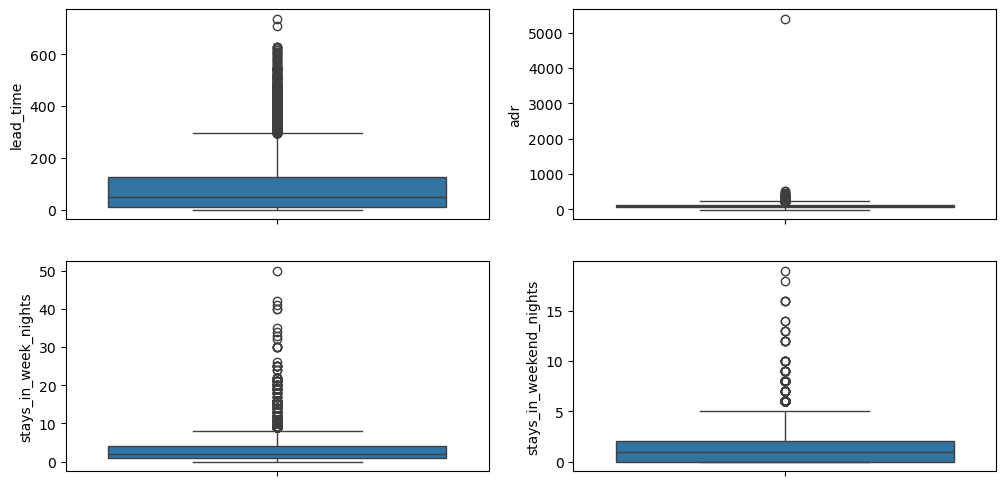

In [17]:
num_cols = ['lead_time', 'adr', 'stays_in_week_nights', 'stays_in_weekend_nights']

plt.figure(figsize=(12,6))
for i,col in enumerate(num_cols,1):
    plt.subplot(2,2,i)
    sns.boxplot(df[col])
plt.show()

4.4 Handling Outliers (IQR Method)

Reason for choosing IQR method  
- The IQR method is used because it is robust to extreme values and works well for skewed real-world data such as hotel pricing and lead time.

In [18]:
Q1 = df['adr'].quantile(0.25)
Q3 = df['adr'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['adr'] >= Q1 - 1.5*IQR) & (df['adr'] <= Q3 + 1.5*IQR)]

Winsorization

In [38]:
#import winsorizer
from scipy.stats.mstats import winsorize

In [39]:
df['lead_time'] = winsorize(df['lead_time'], limits=[0.01, 0.01])
df['adr'] = winsorize(df['adr'], limits=[0.01, 0.01])
df['total_stay'] = winsorize(df['total_stay'], limits=[0.01, 0.01])

In [41]:
df['lead_time'] = winsorize(df['lead_time'], limits=[0.02, 0.02])
df['total_stay'] = winsorize(df['total_stay'], limits=[0.02, 0.02])

In [43]:
def remove_iqr_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[col] >= lower) & (df[col] <= upper)]

In [44]:
df = remove_iqr_outliers(df, 'lead_time')
df = remove_iqr_outliers(df, 'total_stay')

In [46]:
df = df[df['lead_time'] <= 300]

In [47]:
Q1 = df['lead_time'].quantile(0.25)
Q3 = df['lead_time'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
df = df[(df['lead_time'] >= lower) & (df['lead_time'] <= upper)]

*5. Exploratory Data Analysis (EDA)*

5.1 Univariate Analysis  
Hotel Type Distribution

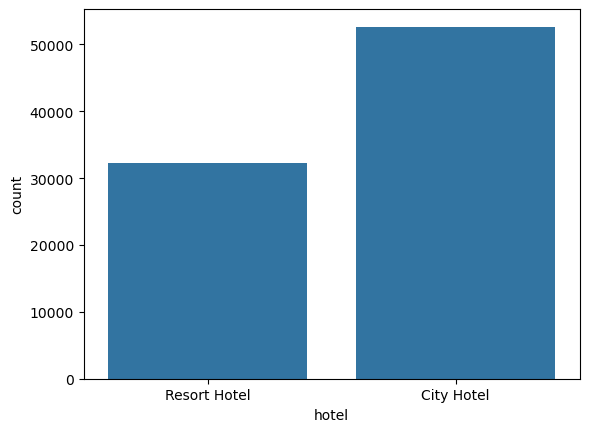

In [19]:
sns.countplot(x='hotel', data=df)
plt.show()

Booking Cancellation Analysis

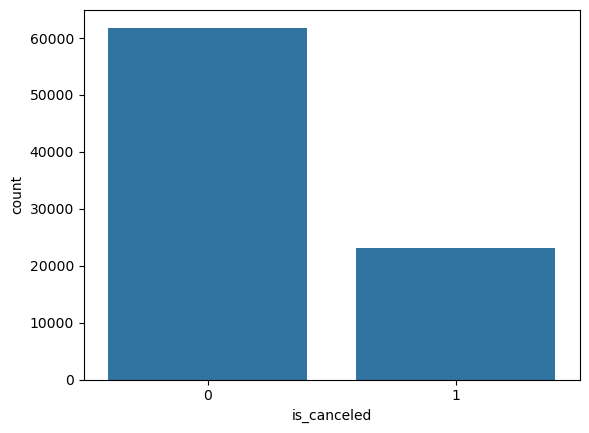

In [20]:
sns.countplot(x='is_canceled', data=df)
plt.show()

5.2 Bivariate Analysis  
Hotel Type vs Cancellation

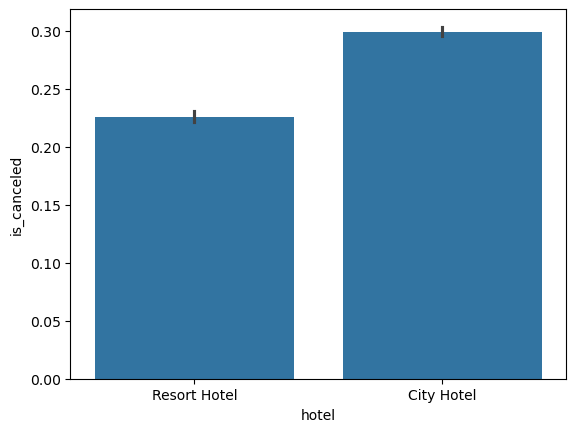

In [21]:
sns.barplot(x='hotel', y='is_canceled', data=df)
plt.show()

Lead Time vs Cancellation

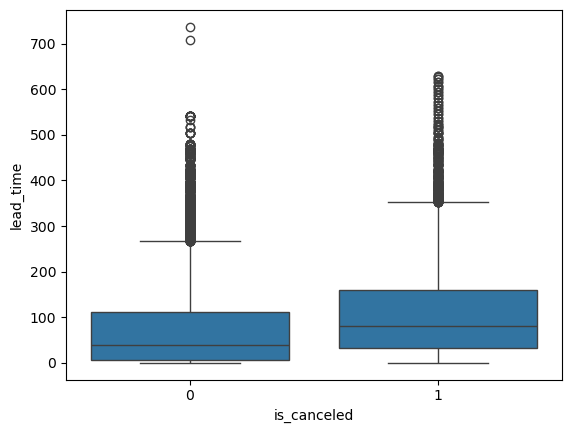

In [22]:
sns.boxplot(x='is_canceled', y='lead_time', data=df)
plt.show()

Market Segment vs Average Daily Rate (ADR) Analysis

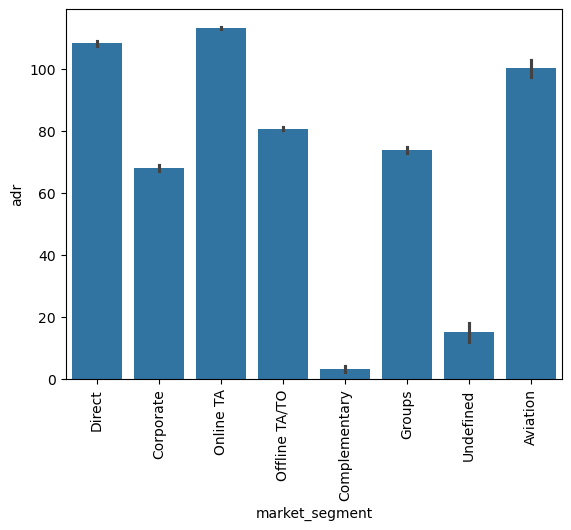

In [23]:
sns.barplot(x='market_segment', y='adr', data=df)
plt.xticks(rotation=90)
plt.show()

5.3 Feature Engineering

In [24]:
df['total_stay'] = df['stays_in_week_nights'] + df['stays_in_weekend_nights']

5.4 Multivariate Analysis  
Correlation Heatmap

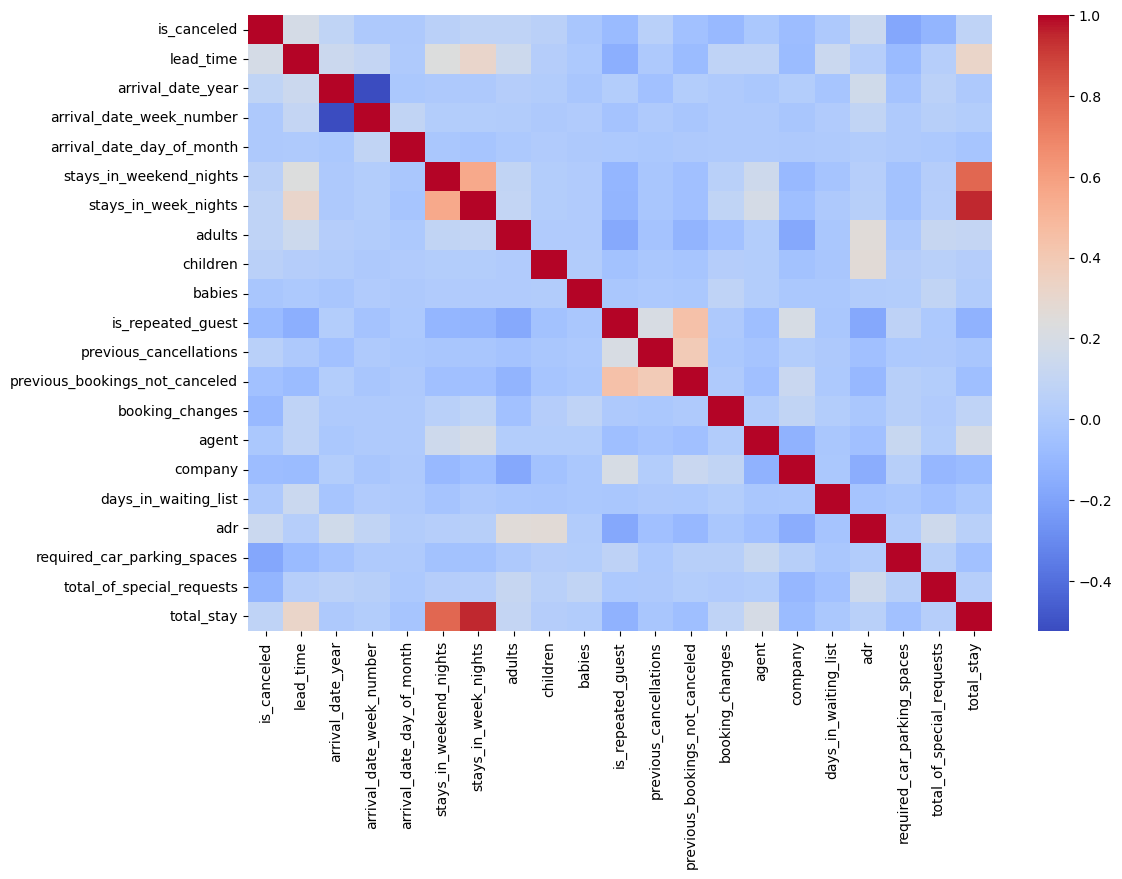

In [25]:
plt.figure(figsize=(12,8))
numeric_df = df.select_dtypes(include=['int64', 'float64'])
sns.heatmap(numeric_df.corr(), cmap='coolwarm', annot=False)
plt.show()

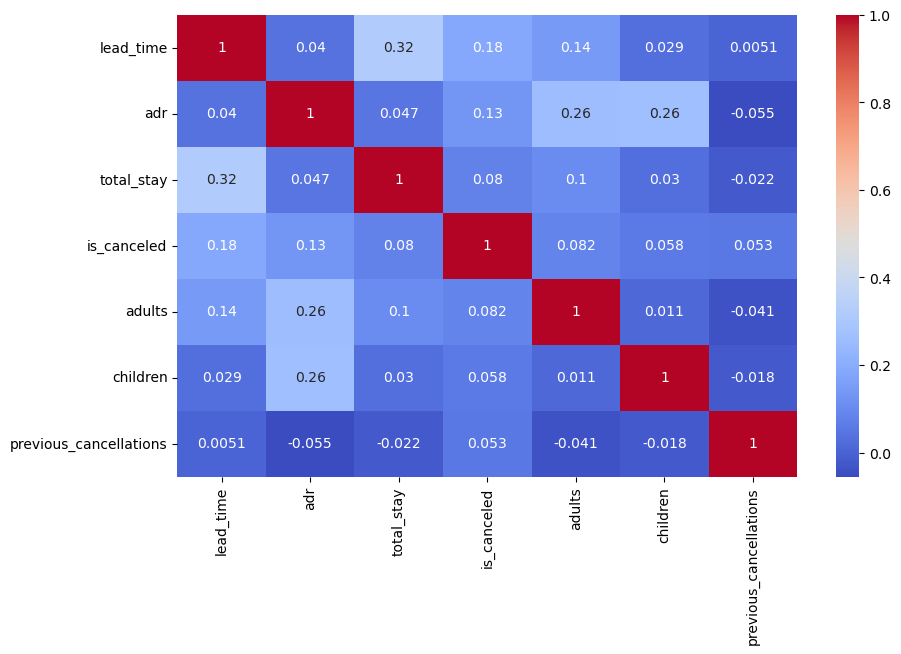

In [26]:
# For better readability
cols = ['lead_time', 'adr', 'total_stay', 'is_canceled',
        'adults', 'children', 'previous_cancellations']

plt.figure(figsize=(10,6))
sns.heatmap(df[cols].corr(), cmap='coolwarm', annot=True)
plt.show()

5.5 Visualizations  
Monthly Booking Trend

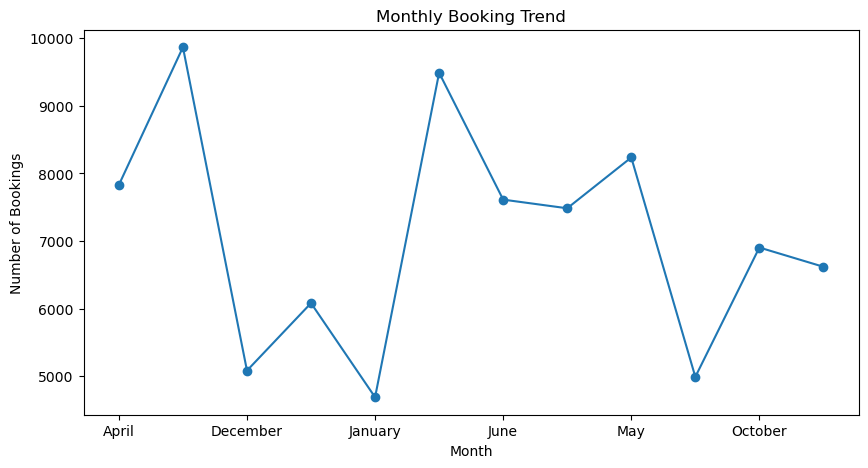

In [27]:
monthly_bookings = df.groupby('arrival_date_month').size()
plt.figure(figsize=(10,5))
monthly_bookings.plot(kind='line', marker='o')
plt.title('Monthly Booking Trend')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.show()

Customer Type vs Cancellation Rate

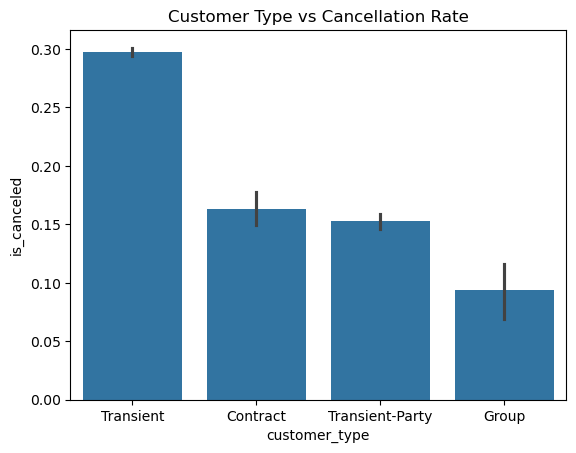

In [28]:
sns.barplot(x='customer_type', y='is_canceled', data=df)
plt.title('Customer Type vs Cancellation Rate')
plt.show()

Total Stay Duration vs ADR

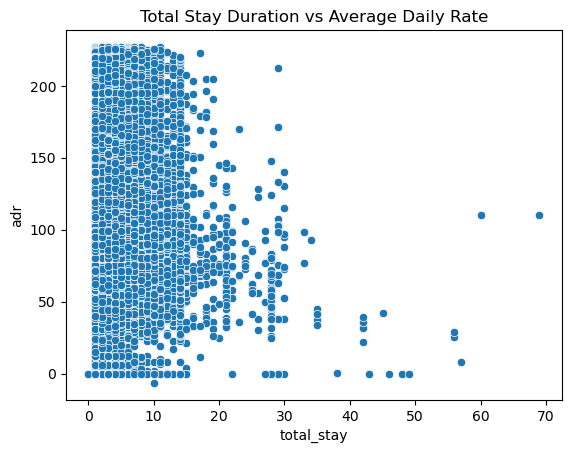

In [29]:
sns.scatterplot(x='total_stay', y='adr', data=df)
plt.title('Total Stay Duration vs Average Daily Rate')
plt.show()

Country-wise Top Booking Distribution

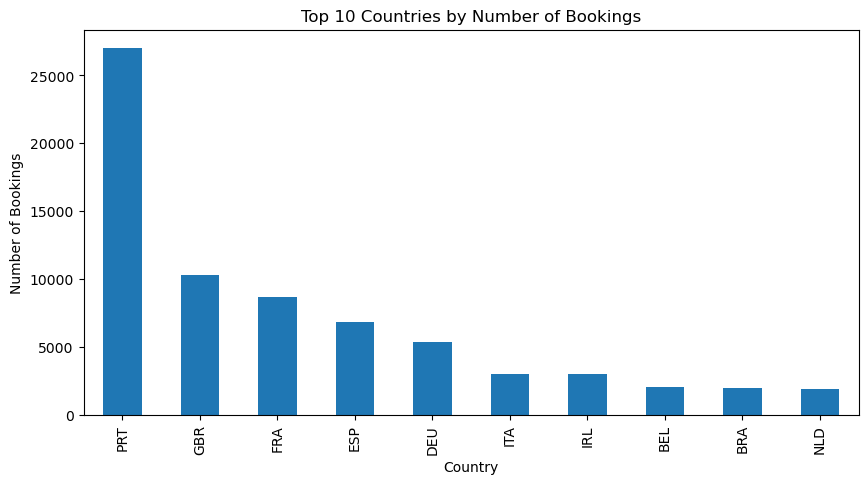

In [30]:
top_countries = df['country'].value_counts().head(10)
plt.figure(figsize=(10,5))
top_countries.plot(kind='bar')
plt.title('Top 10 Countries by Number of Bookings')
plt.xlabel('Country')
plt.ylabel('Number of Bookings')
plt.show()

*6. Data Validation*

In [31]:
#Checking missing values after cleaning
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [32]:
#Checking Duplicate Records after Cleaning
df.duplicated().sum()

np.int64(0)

In [33]:
#Verifying Dataset Shape
df.shape

(84889, 33)

In [34]:
#Verifying Data Types After Cleaning
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 84889 entries, 0 to 119389
Data columns (total 33 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           84889 non-null  object 
 1   is_canceled                     84889 non-null  int64  
 2   lead_time                       84889 non-null  int64  
 3   arrival_date_year               84889 non-null  int64  
 4   arrival_date_month              84889 non-null  object 
 5   arrival_date_week_number        84889 non-null  int64  
 6   arrival_date_day_of_month       84889 non-null  int64  
 7   stays_in_weekend_nights         84889 non-null  int64  
 8   stays_in_week_nights            84889 non-null  int64  
 9   adults                          84889 non-null  int64  
 10  children                        84889 non-null  float64
 11  babies                          84889 non-null  int64  
 12  meal                            8488

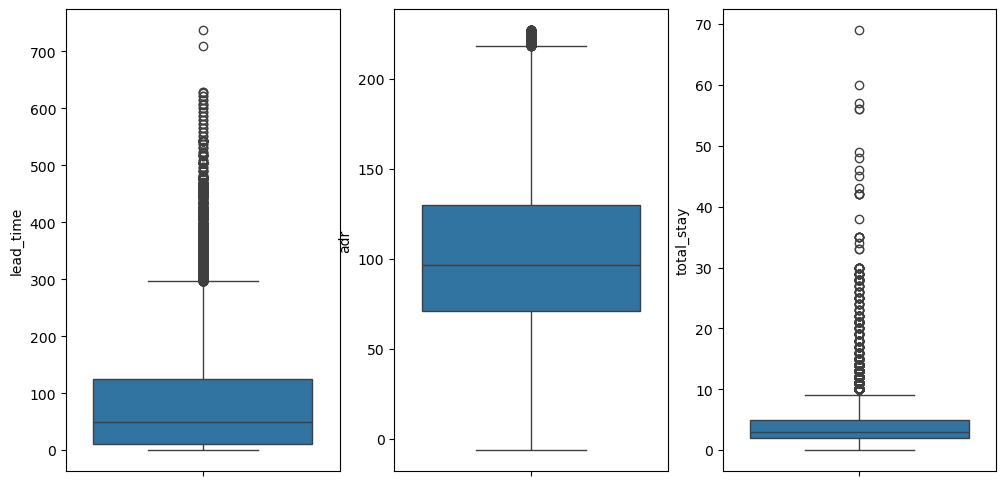

In [35]:
#Verifying Outliers After Treatment
plt.figure(figsize=(12,6))
for i,col in enumerate(['lead_time','adr','total_stay'],1):
    plt.subplot(1,3,i)
    sns.boxplot(df[col])
plt.show()

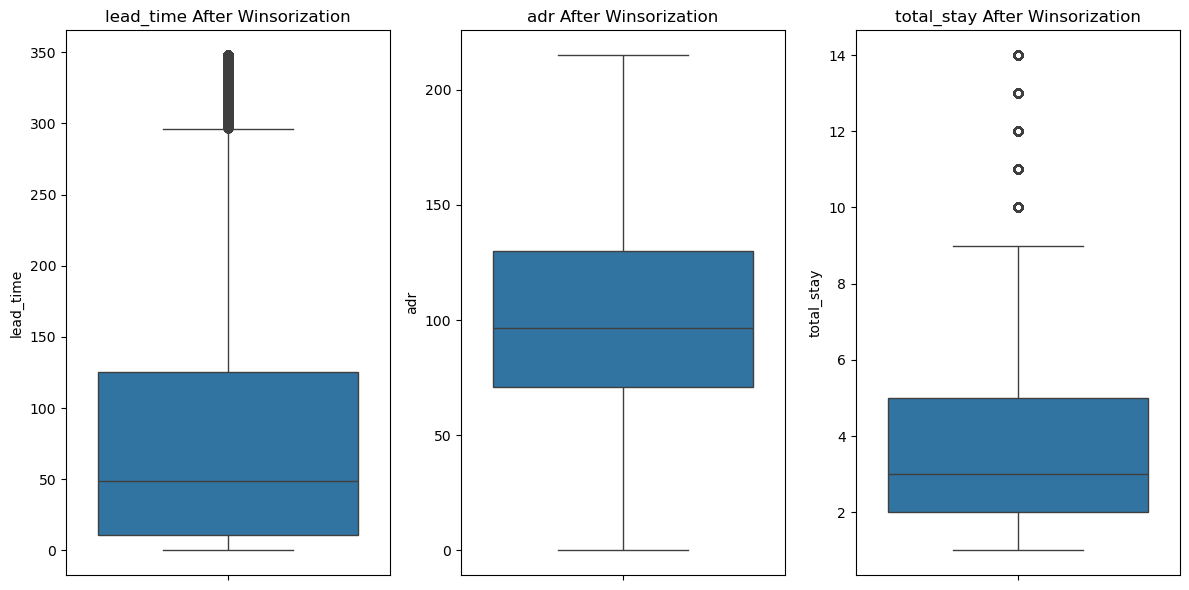

In [40]:
plt.figure(figsize=(12,6))
for i, col in enumerate(['lead_time','adr','total_stay'], 1):
    plt.subplot(1,3,i)
    sns.boxplot(df[col])
    plt.title(f"{col} After Winsorization")
plt.tight_layout()
plt.show()

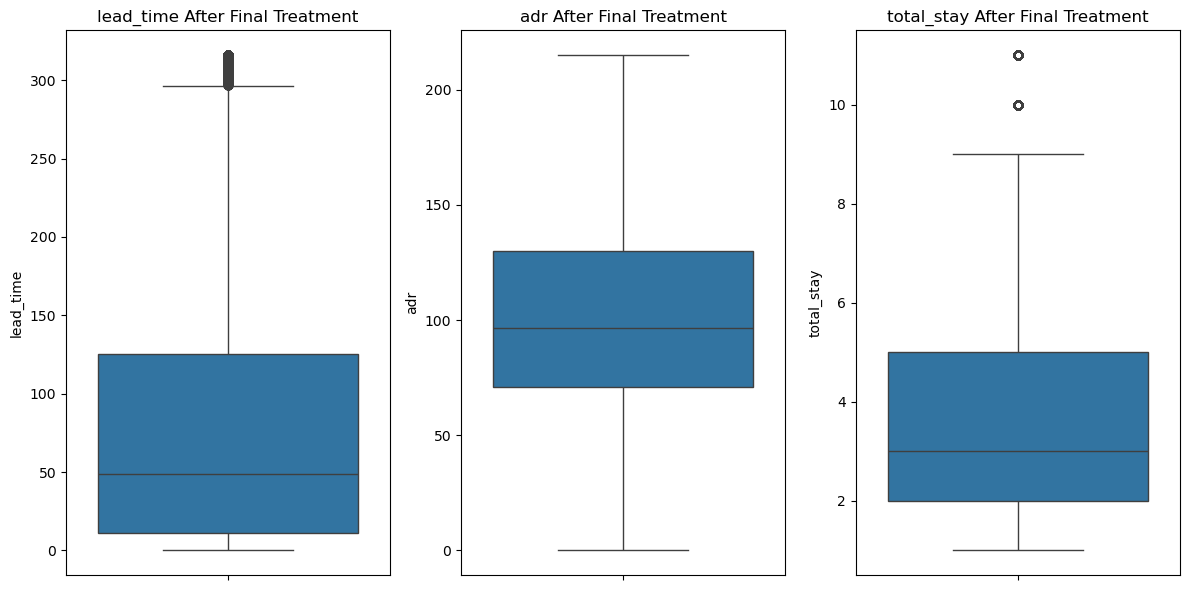

In [42]:
plt.figure(figsize=(12,6))
for i, col in enumerate(['lead_time','adr','total_stay'], 1):
    plt.subplot(1,3,i)
    sns.boxplot(df[col])
    plt.title(f"{col} After Final Treatment")
plt.tight_layout()
plt.show()

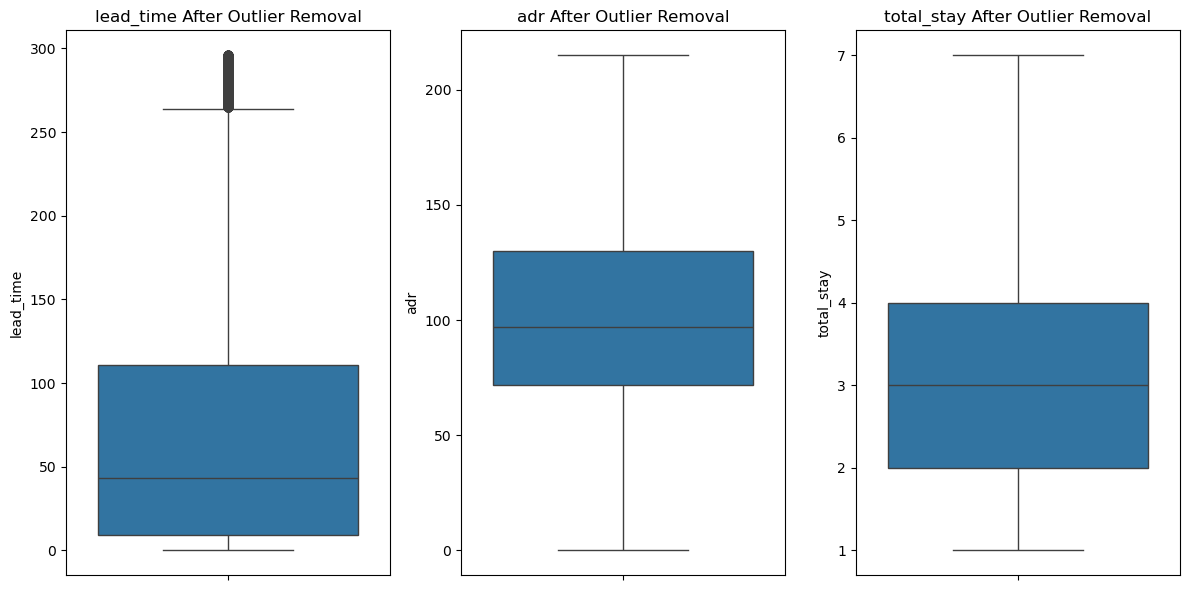

In [45]:
plt.figure(figsize=(12,6))
for i, col in enumerate(['lead_time','adr','total_stay'], 1):
    plt.subplot(1,3,i)
    sns.boxplot(df[col])
    plt.title(f"{col} After Outlier Removal")
plt.tight_layout()
plt.show()

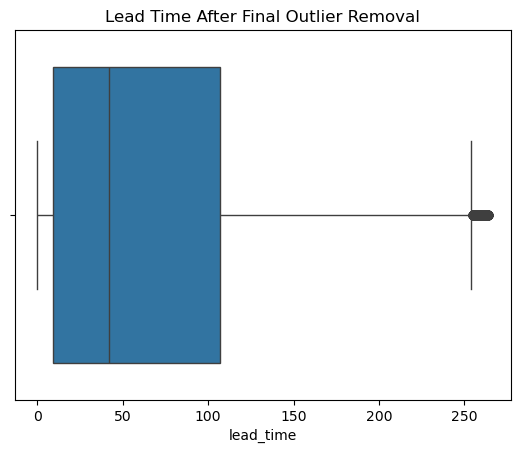

In [48]:
sns.boxplot(x=df['lead_time'])
plt.title("Lead Time After Final Outlier Removal")
plt.show()

In [36]:
#Statistical Summary
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,total_stay
count,84889.000000,84889.000000,84889.000000,84889.000000,84889.000000,84889.000000,84889.00000,84889.000000,84889.000000,84889.000000,...,84889.000000,84889.000000,84889.000000,84889.000000,84889.000000,84889.000000,84889.000000,84889.000000,84889.000000,84889.000000
mean,0.271637,80.150444,2016.199637,26.721907,15.798337,1.001319,2.61313,1.866755,0.117683,0.010472,...,0.031205,0.188776,0.268822,78.846258,11.307001,0.768250,101.788429,0.082013,0.693541,3.614449
std,0.444806,86.460475,0.685912,13.812371,8.842121,1.032651,2.05764,0.627788,0.416169,0.112255,...,0.374386,1.756633,0.724677,109.037505,54.687341,10.145598,45.205950,0.278223,0.827720,2.767990
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,0.000000
25%,0.000000,11.000000,2016.000000,15.000000,8.000000,0.000000,1.00000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,71.100000,0.000000,0.000000,2.000000
50%,0.000000,49.000000,2016.000000,27.000000,16.000000,1.000000,2.00000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,96.530000,0.000000,0.000000,3.000000
75%,1.000000,125.000000,2017.000000,37.000000,23.000000,2.000000,3.00000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,195.000000,0.000000,0.000000,130.000000,0.000000,1.000000,5.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.00000,55.000000,10.000000,10.000000,...,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,227.000000,8.000000,5.000000,69.000000


*7. Key Insights*

*8.Conclusion*

In [49]:
df['lead_time'].max()

264

In [50]:
Q1 = df['lead_time'].quantile(0.25)
Q3 = df['lead_time'].quantile(0.75)
IQR = Q3 - Q1
upper = Q3 + 1.5 * IQR
upper

np.float64(254.0)

In [51]:
df[df['lead_time'] > upper]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_stay
182,Resort Hotel,0,258,2015,July,28,6,2,5,2,...,2.0,0.0,0,Contract,47.25,0,0,Check-Out,2015-07-13,7
5631,Resort Hotel,0,260,2016,May,19,6,2,5,2,...,156.0,0.0,0,Transient,40.76,0,1,Check-Out,2016-05-13,7
5642,Resort Hotel,0,262,2016,May,19,7,2,5,2,...,40.0,0.0,0,Contract,65.40,0,0,Check-Out,2016-05-14,7
5776,Resort Hotel,1,259,2016,May,20,13,2,5,2,...,314.0,0.0,0,Transient,46.40,0,1,Canceled,2016-03-09,7
5924,Resort Hotel,1,263,2016,May,21,16,2,5,2,...,240.0,0.0,0,Transient,46.98,0,0,Canceled,2016-04-21,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118442,City Hotel,0,255,2017,August,33,17,0,3,3,...,9.0,0.0,0,Transient,172.20,0,2,Check-Out,2017-08-20,3
118539,City Hotel,0,262,2017,August,33,17,2,3,2,...,7.0,0.0,0,Transient,92.72,0,0,Check-Out,2017-08-22,5
118759,City Hotel,0,263,2017,August,34,22,0,3,2,...,83.0,0.0,0,Transient,168.00,0,1,Check-Out,2017-08-25,3
118857,City Hotel,0,261,2017,August,34,24,0,3,3,...,16.0,0.0,0,Transient,119.00,0,1,Check-Out,2017-08-27,3


In [52]:
# 99th percentile cap
upper_cap = df['lead_time'].quantile(0.99)
df['lead_time'] = np.where(
    df['lead_time'] > upper_cap,
    upper_cap,
    df['lead_time']
)

In [53]:
Q1 = df['lead_time'].quantile(0.25)
Q3 = df['lead_time'].quantile(0.75)
IQR = Q3 - Q1
upper = Q3 + 1.5 * IQR
df[df['lead_time'] > upper].shape

(0, 33)

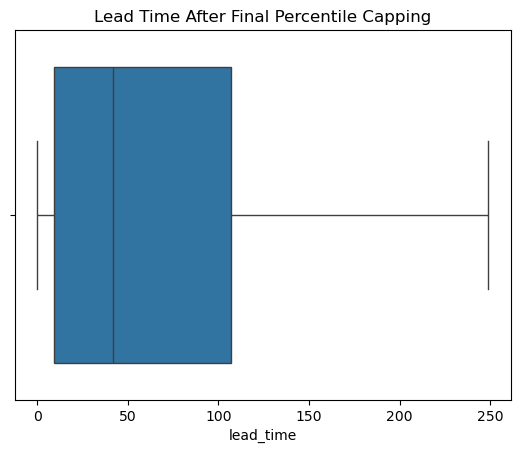

In [54]:
sns.boxplot(x=df['lead_time'])
plt.title("Lead Time After Final Percentile Capping")
plt.show()